# Lab 06: Image Filters

In [1]:
from PIL import Image
from io  import BytesIO
import requests

## Activity 1: Gradient

In [2]:
def make_gradient_image(width, height, source, target):
    ''' Given the width and height of the target image, this function 
    produces a gradient image that goes from source color to target color.
    '''  
    image = Image.new('RGBA', (width,height))
    
    for x in range(width):
        for y in range(height):
            weight = 1.0 - (x / width)
            r = int(source[0]*weight + target[0]*(1 - weight))
            g = int(source[1]*weight + target[1]*(1 - weight))
            b = int(source[2]*weight + target[2]*(1 - weight))
            image.putpixel((x, y),(r,g,b))
        
    return image


### Testing 

Use the `make_gradient_image` function to create two different gradients and `display` them here.

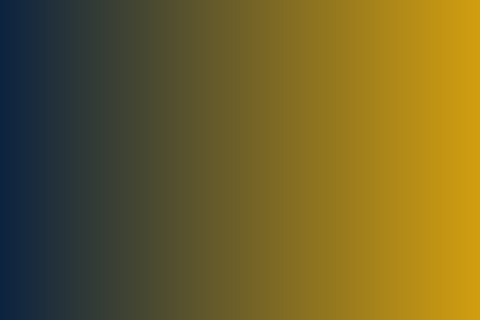

In [3]:
ND_BLUE = (12, 35, 64)
ND_GOLD = (211, 159, 16)
display(make_gradient_image(480, 320, ND_BLUE, ND_GOLD))

### Reflection

1. Describe how you implemented the `make_gradient_image`.  In particular, describe the overall control flow in the function and the computation you performed to determine the color at each pixel.

    <font color="red">The program starts by creating a new image with the specified width and height that the user inputs. Then it enters a for-loop that iterates along each pixel on the x axis. For each iteration of the first for-loop then a second for-loop will iterate down the y-axis. Therefore, I am able to iterate over each pixel from left to right. Next, the program will create an r variable which will hold the red value for the new pixel that will be inserted into my new image. The program determines the r value by taking a weighted average of the red values from the source and target image based on how far from the right the index, x, currently is. To be more specific, the **computation** of the weighted average first determines how far the index, x, is from the right hand side. This is then divided by the total amount to find out on what fraction of the x-axis does the x variable appear. Then, 1.0 is subtracted by this fraction in order to determine a value for how far the pixel is from the end. This value is then multiplied by the red value of the source color. Then 1 minus the weight value will be multiplied by the r value of the target color. Both of these numbers will be added up to create a composite r value for the pixel that will be in the new image. The program will then do this same method for the green and blue values and store them as g and b, respectively. For each pixel, the new r,g,b values will be determined based on the computation above and place that pixel in the corresponding spot. This process of taking the weighted average of the two colors and storing it as a pixel on the new image will continue until every pixel in the image has been iterated over. </font>
    

2. Currently, the `make_gradient_image` function produces a vertical gradient.  How would you instead produce a horizontal gradient?

    <font color="red">I could produce a horizontal gradient by simply changing the computation for the weight variable. If i took the weight relative to how far the y variable is from the y-axis, then the program would create a horizontal gradient rather than a verticle gradient.</font>


## Activity 2: Blend

In [4]:
def blend_images(image1, image2, weight):
    ''' Blend the two given images using the specified weight:
    
        new_pixel = pixel1*weight + pixel2*(1 - weight)
    '''
    size = image1.size
    composite = Image.new('RGBA', (size[0],size[1])) #sets size[0] == width and size[1] == height

    for x in range(size[0]):
        for y in range(size[1]):
            r1, g1, b1 = image1.getpixel((x,y)) #returns tuple
            r2, g2, b2 = image2.getpixel((x,y)) #returns tuple
            r = int(r1*weight + r2*(1 - weight))
            g = int(g1*weight + g2*(1 - weight))
            b = int(b1*weight + b2*(1 - weight))
            compositeColor = (r,g,b)
            composite.putpixel((x, y),compositeColor)
    
    
    return composite

### Testing

Use the `blend_images` function to blend two different pairs of images and `display` them here.

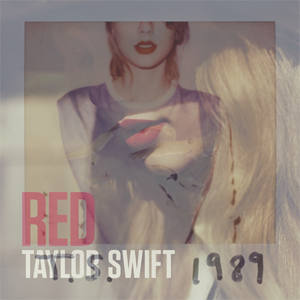

In [5]:
url1 = 'https://upload.wikimedia.org/wikipedia/en/e/e8/Taylor_Swift_-_Red.png'
url2 = 'https://upload.wikimedia.org/wikipedia/en/f/f6/Taylor_Swift_-_1989.png'
image1 = Image.open(BytesIO(requests.get(url1).content))
image2 = Image.open(BytesIO(requests.get(url2).content))
display(blend_images(image1, image2, 0.5))


### Reflection

1. Describe how you implemented the `blend_images`.  In particular, describe the overall control flow in the function and the computation you performed to determine the color at each pixel.

    <font color="red">The program will first start by determining the size of image1 and storing it as a tuple. The program will then create a new RGBA image with the specified width and height of image1. The program will enter a double for-loop in order to iterate over each pixel in the new image. The body of the nested for-loop will then execute which will save the RGB values of the corresponding pixel of image1 as r1, g1, and b1, respectively. It will do the same thing for image2 and save the RGB values as r2,g2, and b2, respectively. Then in order to create a composite picture I first needed to take the composite value of all RGB values of both images for each pixel. Based on the parameter, weight, the program will determine how much numerical weight each color value deserves. This computation is performed by multiplying the r1 value by the weight and the r2 value by 1 minus weight. Then the program will add these computations together to find the composite r value that will be the color value of the corresponding pixel on the new image. The program will find the weighted average for both the green and blue values as well. Once this occurs the composite pixel will then be put in the image at the corresponding location using the new composite values for r, g, and b. This process will occur for all pixels in the new image. This will only work if the paramter weight has a value from 0-1. </font>
    

2. What happens if the two images don't have the same dimensions?  What could you do to ensure that the blend operation always works even if the images are different sizes?

    <font color="red">I believe the easiest way to accomplish this is by resizing one of the images to return a new image with the same dimensions as the other image. I could resize an image to the size of the other image by using the .resize() method. This way I can still use the code that I have already written to blend images that are not the same size.</font>
